<a href="https://colab.research.google.com/github/Ahmed2045/linear-Polynomial-KNN-application/blob/main/linear%26Polynomial%26KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Linear Regression meanSquareError on Validation Set is : 0.19205226264443895
Polynomial Regression meanSquareError on Validation Set is : 0.19183447017450753
K-Nearest Neighbors Regression meanSquareError on Validation Set is : 0.2139717345669934


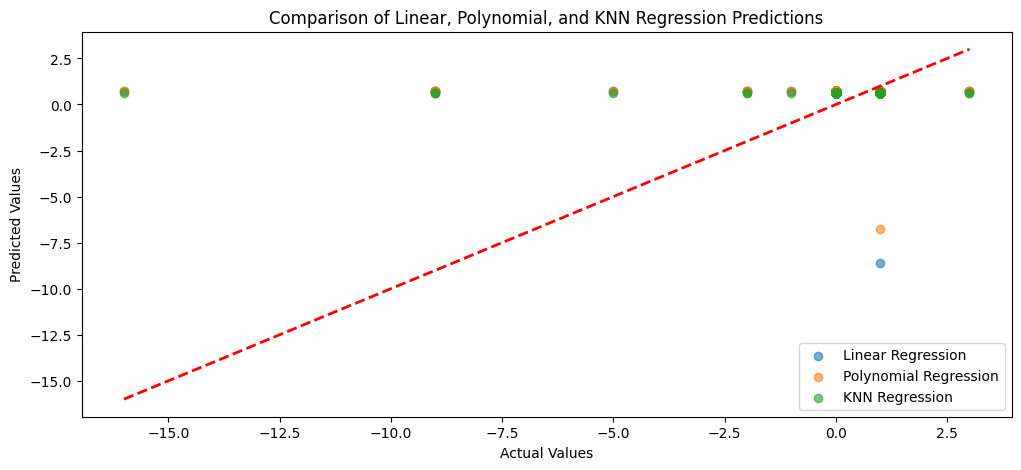

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor



DataSet = '/content/archive.zip'
data = pd.read_csv(DataSet)
target_coulmn = 'Years until sold'

X = data.drop(target_coulmn, axis=1)
y = data[target_coulmn]

# Divide the dataset  training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp .
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50% temp split into validation and test.

# Step 2: Preprocessing Pipeline
# Set up a preprocessing pipeline for numerical and categorical features
numericFeatures = X_train.select_dtypes(include=['float64', 'int64']).columns  # Identify numerical features.
categoryFeatures = X_train.select_dtypes(include=['object']).coluintomns  # Identify categorical features.

numericTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean.
    ('scaler', StandardScaler())  # Standardize numerical features.
])

categoryTransformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value.
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features.
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericTransformer, numericFeatures),  # Apply numericTransformer to numerical features.
        ('cat', categoryTransformer, categoryFeatures)  # Apply categoryTransformer to categorical features.
    ])

# Fit the preprocessing pipeline to the training data and transform the validation and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)  # Fit and transform the training set.
X_val_preprocessed = preprocessor.transform(X_val)  # Transform the validation set.
X_test_preprocessed = preprocessor.transform(X_test)  # Transform the test set.

# Step 3: Feature Selection
num_features_to_select = 5  # Select the top 5 features.

selector = SelectKBest(score_func=f_classif, k=num_features_to_select)  # Use ANOVA F-statistic for feature selection.
X_train_selected = selector.fit_transform(X_train_preprocessed, y_train)  # Fit and transform on the training set.
X_val_selected = selector.transform(X_val_preprocessed)  # Transform the validation set.
X_test_selected = selector.transform(X_test_preprocessed)  # Transform the test set.

# Step 4: Linear Regression
LinearRegression_model = LinearRegression()  # Create a linear regression model.
LinearRegression_model.fit(X_train_selected, y_train)  # Train the model on the selected features.
y_val_pred_linear = LinearRegression_model.predict(X_val_selected)  # Predict on the validation set.
meanSquareError = mean_squared_error(y_val, y_val_pred_linear)  # Calculate Mean Squared Error .
print(f"Linear Regression meanSquareError on Validation Set is : {meanSquareError}")  # Print the MSE.


# Step 5: polynomial
polynomialTransformer = PolynomialFeatures(degree=2, include_bias=False)

polynomialRegression = make_pipeline(polynomialTransformer, LinearRegression())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericTransformer, numericFeatures),
        ('cat', categoryTransformer, categoryFeatures),
        ('poly', polynomialRegression, numericFeatures)  # Add polynomial regression step
    ])



# Step 5: Polynomial Regression
polynomialRegression_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
polynomialRegression_model.fit(X_train_selected, y_train)
y_val_pred_poly = polynomialRegression_model.predict(X_val_selected)
meanSquareError_poly = mean_squared_error(y_val, y_val_pred_poly)
print(f"Polynomial Regression meanSquareError on Validation Set is : {meanSquareError_poly}")


# Step 6: K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)  # Use 5 neighbors
knn_model.fit(X_train_selected, y_train)
y_val_pred_knn = knn_model.predict(X_val_selected)
meanSquareError_knn = mean_squared_error(y_val, y_val_pred_knn)
print(f"K-Nearest Neighbors Regression meanSquareError on Validation Set is : {meanSquareError_knn}")





# Scatter plot of actual vs. predicted values for linear, polynomial, and KNN regression
plt.figure(figsize=(12, 5))

# Linear Regression
plt.scatter(y_val, y_val_pred_linear, label='Linear Regression', alpha=0.6)

# Polynomial Regression
plt.scatter(y_val, y_val_pred_poly, label='Polynomial Regression', alpha=0.6)

# K-Nearest Neighbors Regression
plt.scatter(y_val, y_val_pred_knn, label='KNN Regression', alpha=0.6)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
plt.title('Comparison of Linear, Polynomial, and KNN Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Display plot
plt.show()


